<a href="https://colab.research.google.com/github/sridadi229/insuranceanalyst/blob/main/Insurance_Analyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive

In [3]:
drive.mount ('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/colab/insurance.csv')

In [5]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.duplicated().sum()

1

In [11]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [12]:
df[df.duplicated(keep = 'last')]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631


In [13]:
df.drop_duplicates(inplace = True)

In [14]:
df.shape

(1337, 7)

In [15]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [16]:
conditions = [
              (df['age'] <= 13),
              (df['age'] >= 13) & (df['age'] <= 19),
              (df['age'] >= 19)
]

values = ['kids', 'Tenageer', 'Adult']

df['age_level'] = np.select(conditions, values)

In [17]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges,age_level
0,19,female,27.900,0,yes,southwest,16884.92400,Tenageer
1,18,male,33.770,1,no,southeast,1725.55230,Tenageer
2,28,male,33.000,3,no,southeast,4449.46200,Adult
3,33,male,22.705,0,no,northwest,21984.47061,Adult
4,32,male,28.880,0,no,northwest,3866.85520,Adult
5,31,female,25.740,0,no,southeast,3756.62160,Adult
6,46,female,33.440,1,no,southeast,8240.58960,Adult
7,37,female,27.740,3,no,northwest,7281.50560,Adult
8,37,male,29.830,2,no,northeast,6406.41070,Adult
9,60,female,25.840,0,no,northwest,28923.13692,Adult


In [18]:
df['smoker'] = df['smoker'].map(
    {'yes':True, 'no':False})

In [22]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges,age_level
0,19,female,27.900,0,True,southwest,16884.92400,Tenageer
1,18,male,33.770,1,False,southeast,1725.55230,Tenageer
2,28,male,33.000,3,False,southeast,4449.46200,Adult
3,33,male,22.705,0,False,northwest,21984.47061,Adult
4,32,male,28.880,0,False,northwest,3866.85520,Adult
5,31,female,25.740,0,False,southeast,3756.62160,Adult
6,46,female,33.440,1,False,southeast,8240.58960,Adult
7,37,female,27.740,3,False,northwest,7281.50560,Adult
8,37,male,29.830,2,False,northeast,6406.41070,Adult
9,60,female,25.840,0,False,northwest,28923.13692,Adult


In [27]:
#Hitung jumlah gmv yang dikelompokkan berdasarkan bulan - tahun
totalsmokerbysex = df.groupby('sex')['smoker'].sum().reset_index()

#Tampilkan data
totalsmokerbysex

,sex,smoker
0,female,115
1,male,159


In [ ]:
totalsmokerbyregion = df.groupby('region')['smoker'].sum().reset_index()

totalsmokerbyregion

In [ ]:
totalchargesbyregion = df.groupby('region')['charges'].sum().reset_index()

totalchargesbyregion

In [ ]:
totalsmokerbyagelevel = df.groupby('age_level')['smoker'].sum().reset_index()

totalsmokerbyagelevel

In [49]:
totalchargesbysex = df.groupby('sex')['charges'].sum().reset_index()

totalchargesbysex

,sex,charges
0,female,8.321061e+06
1,male,9.433124e+06


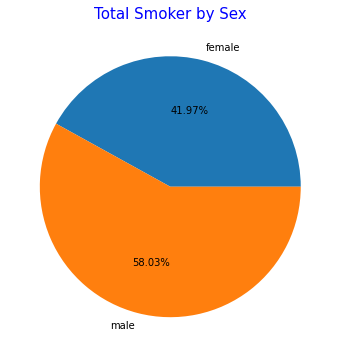

In [50]:
totalsmokerbysex = df.groupby('sex')['smoker'].sum().reset_index()

plt.figure(figsize=(6,6))
plt.pie(totalsmokerbysex['smoker'], labels = totalsmokerbysex['sex'], autopct='%1.2f%%')
plt.title('Total Smoker by Sex', loc='center', pad=5, fontsize=15, color='blue')

plt.show()

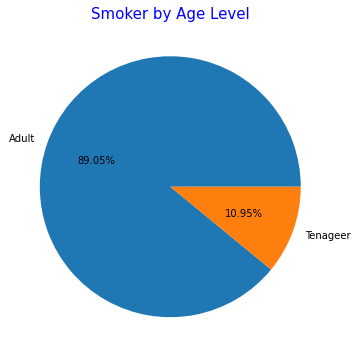

In [52]:
totalsmokerbyagelevel = df.groupby('age_level')['smoker'].sum().reset_index()

plt.figure(figsize=(6,6))
plt.pie(totalsmokerbyagelevel['smoker'], labels = totalsmokerbyagelevel['age_level'], autopct='%1.2f%%')
plt.title('Smoker by Age Level', loc='center', pad=5, fontsize=15, color='blue')

plt.show()

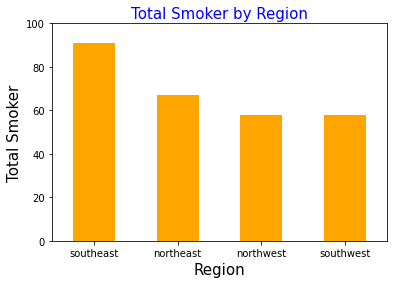

In [57]:
#Definisikan nilai
totalsmokerbyregion = df.groupby('region')['smoker'].sum().sort_values(ascending =False).plot(kind='bar', color='Orange')

#Definisikan bar chart
plt.title('Total Smoker by Region', loc='center', pad=5, fontsize=15, color='blue')
plt.xlabel('Region', fontsize=15)
plt.ylabel('Total Smoker', fontsize=15)
plt.ylim(ymin = 0)

labels, location = plt.yticks()
plt.yticks(labels)
plt.xticks(rotation=0)
plt.show()


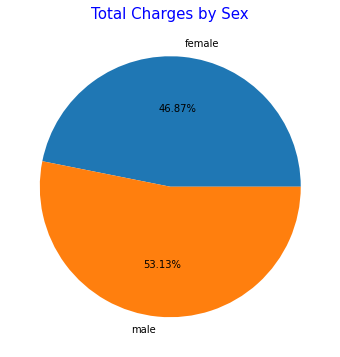

In [54]:
totalchargesbysex = df.groupby('sex')['charges'].sum().reset_index()

plt.figure(figsize=(6,6))
plt.pie(totalchargesbysex['charges'], labels = totalchargesbysex['sex'], autopct='%1.2f%%')
plt.title('Total Charges by Sex', loc='center', pad=5, fontsize=15, color='blue')

plt.show()

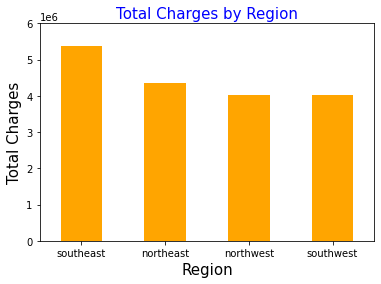

In [56]:
#Definisikan nilai
totalchargesbyregion = df.groupby('region')['charges'].sum().sort_values(ascending =False).plot(kind='bar', color='orange')

#Definisikan bar chart
plt.title('Total Charges by Region', loc='center', pad=5, fontsize=15, color='blue')
plt.xlabel('Region', fontsize=15)
plt.ylabel('Total Charges', fontsize=15)
plt.ylim(ymin = 0)

labels, location = plt.yticks()
plt.yticks(labels)
plt.xticks(rotation=0)
plt.show()


#**Conclusion**